In [28]:
# Hierarchical Clustering

In [42]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)

In [44]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [45]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [46]:
# Encoding categorical data
df = encoding_char(df)

In [47]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['age','sex','income','married','children','car','mortgage','delays']).round()

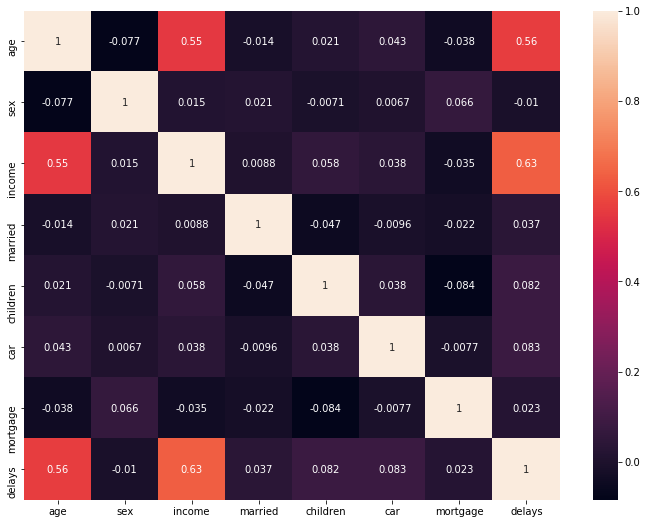

In [48]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

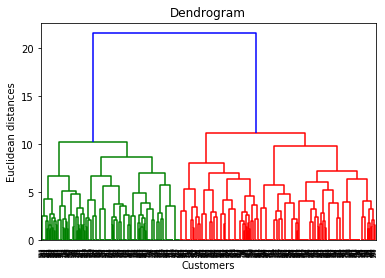

In [36]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [49]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [50]:
hc

array([2, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 0, 1, 0,
       1, 2, 2, 1, 3, 0, 3, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 3, 0, 1, 3,
       2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 3, 2, 0, 2, 2, 2, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 3, 2, 0, 0, 2, 0, 3, 1, 1, 1, 0, 2, 3,
       2, 3, 1, 2, 1, 1, 0, 2, 2, 1, 3, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1,
       2, 1, 3, 0, 3, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 3, 0, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 3, 0, 3, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 3, 3, 0,
       2, 1, 0, 3, 1, 1, 1, 2, 2, 2, 3, 3, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       1, 0, 1, 3, 2, 0, 0, 1, 3, 3, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 3,
       2, 0, 1, 1, 1, 2, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 3, 0, 0,
       0, 1, 0, 1, 2, 1, 1, 0, 0, 3, 3, 0, 2, 0, 2,

In [38]:
# Less features
X = df.iloc[:, [0, 2, 7]]

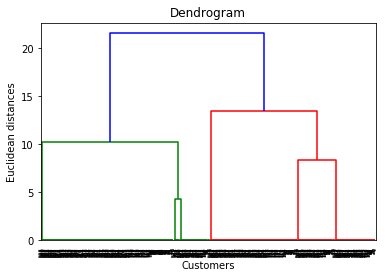

In [39]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [51]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [52]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()